In [1]:
%matplotlib inline
import os

import numpy as np
import xarray as xr

import util

#import plotting modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from matplotlib.colorbar import Colorbar 
from matplotlib import ticker, cm
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean
from matplotlib.ticker import FormatStrFormatter


# Load in Observational and Model Data
### CHL Observations

In [2]:
#if Chl
ds_obs_chl = xr.open_zarr(f'{util.project_tmpdir}/seawifs_mapped_monthly_chl_gsm_DJF.POP_gx1v6.zarr')
ds_obs_chl['Chl_surf'] = ds_obs_chl['chl_gsm']
#select specific variables to include in sliced dataset
grid_vars = ['KMT', 'TAREA', 'TLAT', 'TLONG', 'time']
data_vars = ['Chl_surf']
# Slice to SO
ds_obs_chl = ds_obs_chl[data_vars+grid_vars].isel(nlat=slice(0, 93))
# Slice to ref time
#ds_obs_chl = ds_obs_chl.isel(time=slice(110, 145))
ds_obs_chl

<xarray.Dataset>
Dimensions:   (nlat: 93, nlon: 320, time: 12)
Coordinates:
    TLAT      (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
    TLONG     (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
  * time      (time) int64 1998 1999 2000 2001 2002 ... 2005 2006 2007 2009 2010
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf  (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
    KMT       (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>
    TAREA     (time, nlat, nlon) float64 dask.array<chunksize=(1, 93, 320), meta=np.ndarray>

### SST Observations

In [3]:
#if SST
ds_obs_sst = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/HadISST_DJF.POP_gx1v6.zarr')
ds_obs_sst['SST'] = ds_obs_sst['sst']
grid_vars = ['KMT', 'TAREA', 'TLAT', 'TLONG', 'time']
data_vars = ['SST']
# Slice to SO
ds_obs_sst = ds_obs_sst[data_vars+grid_vars].isel(nlat=slice(0, 93))
# Slice to ref time
ds_obs_sst = ds_obs_sst.isel(time=slice(110, 145))
ds_obs_sst

<xarray.Dataset>
Dimensions:  (nlat: 93, nlon: 320, time: 35)
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(93, 160), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(93, 160), meta=np.ndarray>
  * time     (time) int64 1981 1982 1983 1984 1985 ... 2011 2012 2013 2014 2015
Dimensions without coordinates: nlat, nlon
Data variables:
    SST      (time, nlat, nlon) float64 dask.array<chunksize=(4, 93, 80), meta=np.ndarray>
    KMT      (nlat, nlon) int32 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA    (nlat, nlon) float64 dask.array<chunksize=(93, 160), meta=np.ndarray>

## Load in Model Output

In [4]:
ds_mod = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/cesm-le-fields-djf.zarr')
ds_mod = ds_mod.isel(nlat=slice(0, 93))
 
#Simplify
grid_vars = ['KMT', 'TAREA', 'TLAT', 'TLONG', 'time']
data_vars = ['SST', 'Chl_surf']
ds_mod = ds_mod[data_vars+grid_vars]
# Slice Times
ds_mod_chl = ds_mod.isel(time=slice(77, 90))
ds_mod_sst = ds_mod.isel(time=slice(60, 95))
ds_mod

<xarray.Dataset>
Dimensions:             (length: 3, member_id: 34, nlat: 93, nlon: 320, time: 180, z_t: 60, z_t_150m: 15)
Coordinates:
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA               (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT                (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG               (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    dz                  (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
  * length              (length) float64 20.0 40.0 60.0
  * member_id           (member_id) int64 1 2 9 10 11 12 ... 101 102 103 104 105
  * time                (time) int64 1921 1922 1923 1924 ... 2097 2098 2099 2100
  * z_t                 (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    Chl_surf_ctrl       (time, nlat, nlon) float64 dask.array<chunksize=(180, 93, 320), meta=np.ndarray>
    IFRAC               (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    IFRAC_ctrl          (time, nlat, nlon) float64 dask.array<chunksize=(180, 93, 320), meta=np.ndarray>
    Jint_100m_DIC       (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    Jint_100m_DIC_ctrl  (time, nlat, nlon) float64 dask.array<chunksize=(180, 93, 320), meta=np.ndarray>
    KGP                 (time, length, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 3, 1, 93, 320), meta=np.ndarray>
    KGP_ctrl            (time, length, nlat, nlon) float64 dask.array<chunksize=(180, 3, 93, 320), meta=np.ndarray>
    NPP                 (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    NPP_ctrl            (time, nlat, nlon) float64 dask.array<chunksize=(180, 93, 320), meta=np.ndarray>
    SST                 (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    SST_ctrl            (time, nlat, nlon) float64 dask.array<chunksize=(180, 93, 320), meta=np.ndarray>
    year_frac           (time) float64 dask.array<chunksize=(180,), meta=np.ndarray>

## Run Quick Test Plots

model output
min 0.0
max 6.092274341402422
mean 0.49876495408770377


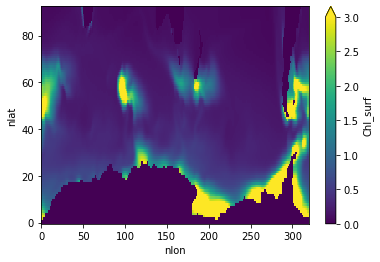

In [99]:
print('model output')
ds_mod_chl.mean(['member_id','time']).Chl_surf.plot(vmax=3)
print('min',ds_mod_chl.mean(['member_id','time']).Chl_surf.min().values)
print('max',ds_mod_chl.mean(['member_id','time']).Chl_surf.max().values)
print('mean',ds_mod_chl.mean(['member_id','time']).Chl_surf.mean().values)

observations
min 0.0
max 34.496167822309395
mean 0.21483348077628256


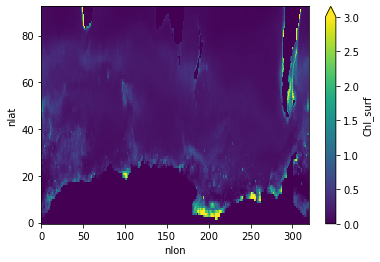

In [98]:
print('observations')
ds_obs_chl.mean(['time']).Chl_surf.plot(vmax=3)
print('min', ds_obs_chl.mean(['time']).Chl_surf.min().values)
print('max', ds_obs_chl.mean(['time']).Chl_surf.max().values)
print('mean', ds_obs_chl.mean(['time']).Chl_surf.mean().values)

bias
min -34.33490836137162
max 5.987840260313435
mean 0.28393147331142127


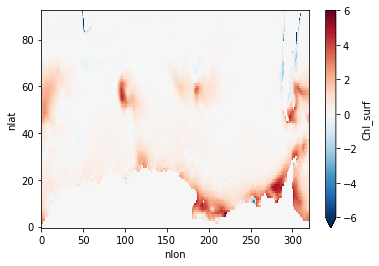

In [100]:
biased = ds_mod_chl.mean(['member_id','time']).Chl_surf - ds_obs_chl.mean(['time']).Chl_surf
print('bias')
biased.plot(vmax = 6)

print('min',biased.min().values)
print('max',biased.max().values)
print('mean',biased.mean().values)

## Make POP friendly datasets (for each variable)

In [102]:
v = 'Chl_surf'
dso = ds_obs_chl
dsm = ds_mod_chl

# Polar Plottable
dsp_c = util.pop_add_cyclic(
    xr.Dataset({
        f'dso_{v}_mean': dso[v].mean('time').compute(),
        f'dsm_{v}_mean': dsm[v].mean(dim=['member_id', 'time']).compute(),
        f'{v}_mean_bias': dsm[v].mean(dim=['member_id', 'time']) - dso[v].mean('time').compute(),

        'TLAT': dsm.TLAT.compute(),
        'TLONG': dsm.TLONG.compute() } ))
dsp_c

<xarray.Dataset>
Dimensions:             (nlat: 93, nlon: 321)
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT                (nlat, nlon) float64 -79.22 -79.22 ... -30.08 -30.08
    TLONG               (nlat, nlon) float64 -220.6 -219.4 ... 138.3 139.4
    dso_Chl_surf_mean   (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dsm_Chl_surf_mean   (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Chl_surf_mean_bias  (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

## Chlorophyll Plotting Function

In [205]:
# Set log normalized levels for Chlorophyll
levels = np.logspace(-2,.8,11) #np.logspace(-1.65,.22,11)
# Double check your levels
print(['{:f}'.format(x) for x in levels])
# Model and Observation Colors
cmap = cmocean.tools.crop_by_percent(cmocean.cm.dense, 10, which='max', N=None)
#norm = colors.LogNorm(vmin=levels[0], vmax=levels[-1])
norm = colors.BoundaryNorm(levels, cmap.N)

def chl_plot(da, lines=True):
    # filled contours at set levels
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da, #np.log10(da),
                     levels=levels,
                     norm=norm,
                     cmap=cmap,
                     transform=ccrs.PlateCarree())

    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    ax.gridlines(linewidth=.25, color='black', alpha=0.7, linestyle='--').n_steps = 90  ## this makes them rounder
    return cf


['0.010000', '0.019055', '0.036308', '0.069183', '0.131826', '0.251189', '0.478630', '0.912011', '1.737801', '3.311311', '6.309573']


In [272]:
# Set log normalized levels for Chlorophyll
levels_bias = np.linspace(-2, 6, 9)

# Model and Observation Colors
cmap_bias = cmocean.cm.balance

# Double check your levels
print(levels_bias)
#normalize
norm_bias = MidpointNormalize(midpoint=0.)
norm_bias = colors.BoundaryNorm(levels_bias, cmap_bias.N)
divnorm = colors.TwoSlopeNorm(vmin=-2., vcenter=0, vmax=6)

def bias_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels_bias,
                     norm=divnorm,
                     cmap=cmap_bias,
                     transform=ccrs.PlateCarree())
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    ax.gridlines(linewidth=.25, color='black', alpha=0.7, linestyle='--').n_steps = 90  ## this makes them rounder
    return cf

[-2. -1.  0.  1.  2.  3.  4.  5.  6.]


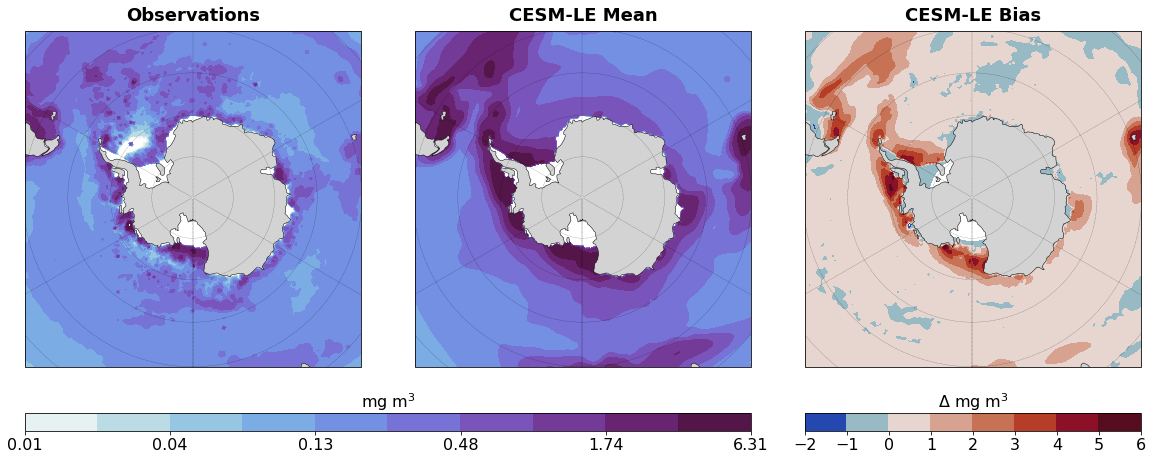

In [274]:
####################### Figure Setup #########################
fig = plt.figure(figsize=(20, 12)) 
gs = gridspec.GridSpec(2,3, height_ratios=[2,0.1]) # 2 rows, 3 columns
t1, t2, t3 = 'Observations', 'CESM-LE Mean', 'CESM-LE Bias' # titles

# Specific Data for Plot:  Observations -- CESM-LE -- CESM-LE Bias
dsp = dsp_c #chlorophyll pop dataset
vp1 = 'dso_Chl_surf_mean'
vp2 = 'dsm_Chl_surf_mean'
vp3 = 'Chl_surf_mean_bias'
unit = 'mg m$^3$'
pt = 'Chl_surf-BIAS' #saved-title
# Extent and Projection
prj = ccrs.SouthPolarStereo()

###################### PLOT OBSERVATIONS ######################
ax = fig.add_subplot(gs[0, 0], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

cf = chl_plot(dsp[vp1],lines = False)

ax.set_title(f'{t1}', fontsize = 18, fontweight = 'bold',pad=10)
###################### PLOT MODEL ######################
ax = fig.add_subplot(gs[0, 1], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

cf = chl_plot(dsp[vp2],lines = False)

ax.set_title(f'{t2}', fontsize = 18, fontweight = 'bold',pad=10)

# ~~~~~~~~~~~~~~~~~~~~~COLORBAR FOR OBS VS MODEL~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cbax = plt.subplot(gs[1,:2]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')

cb.set_label(f'{unit}', labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(labelsize=16)
# LABEL COLORBAR:
cb.ax.set_xticklabels(np.round(levels[::2], 2))

#######################  BIAS PLOT  ########################

ax = fig.add_subplot(gs[0, 2], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = bias_plot(dsp[vp3], lines=False)
ax.set_title(f'{t3}', fontsize = 18, fontweight = 'bold',pad=10)

# ~~~~~~~~~~~~~~~~~~~~~~~~ BIAS COLORBAR ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cbax = plt.subplot(gs[1,2:]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf,orientation = 'horizontal')#, ticklocation = 'top')
# labels
cb.set_label(f'$\Delta$ {unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(labelsize=16)

########################################################
ax = fig.get_axes()
gs.update(hspace=0.16, wspace= 0.16, bottom=0.4)

# --------------------------------------------------------
title = (f'{pt}')
path = 'figures/'
file = '.pdf'
plt.savefig(path + title + file, bbox_inches='tight')

___
# Repeat for SST

In [103]:
v = 'SST'
dso = ds_obs_sst.compute()
dsm = ds_mod_sst.compute()

# Polar Plottable
dsp_t = util.pop_add_cyclic(
    xr.Dataset({
        f'dso_{v}_mean': dso[v].mean('time').compute().drop(['TLAT', 'TLONG']),
        f'dsm_{v}_mean': dsm[v].mean(dim=['member_id', 'time']).compute().drop(['TLAT', 'TLONG']),
        f'{v}_mean_bias': dsm[v].mean(dim=['member_id', 'time']) - dso[v].mean('time').compute(),

        'TLAT': dsm.TLAT.compute(),
        'TLONG': dsm.TLONG.compute() } ))
dsp_t

<xarray.Dataset>
Dimensions:        (nlat: 93, nlon: 321)
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT           (nlat, nlon) float64 -79.22 -79.22 -79.22 ... -30.08 -30.08
    TLONG          (nlat, nlon) float64 -220.6 -219.4 -218.3 ... 138.3 139.4
    dso_SST_mean   (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dsm_SST_mean   (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SST_mean_bias  (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

# Make 3 SST Plot Function:

In [104]:
# for SST
levels_cont = [-1, 5]
levels = np.linspace(-2, 18, 11)
#levels_chng = np.linspace(dsp_t.SST_mean_bias.min().values, dsp_t.SST_mean_bias.max().values, 11)
levels_chng = np.arange(-2,5,.5)#np.linspace(-2, 4.5, 11)
#cb_labels = [-1,  -0.8,  -0.6,  -0.4,  -0.2, 0.01 ]
cb_labels = [-1,  -0.8,  -0.6,  -0.4,  -0.2, 0.01 ]

cmap = cmocean.cm.thermal
cmap_chng = cmocean.cm.balance

extent = ([-180, 180, -90, -50], ccrs.PlateCarree())
prj = ccrs.SouthPolarStereo()
fmt = '%.2f'

In [105]:
def epoch_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels, extend = 'max',
                     cmap=cmap,
                     transform=ccrs.PlateCarree())
    # contour lines
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='k',
                    levels=levels,#_cont,
                    linewidths=0.05,
                    transform=ccrs.PlateCarree())
    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    ax.gridlines(linewidth=.25, color='black', alpha=0.7, linestyle='--').n_steps = 90  ## this makes them rounder
    return cf

In [106]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [107]:
def change_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels_chng,
                     norm=MidpointNormalize(midpoint=0.),
                     cmap=cmap_chng,
                     transform=ccrs.PlateCarree())
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='k', 
                    levels=levels_chng,
                    linewidths=.05,
                    transform=ccrs.PlateCarree())
    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
   
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    ax.gridlines(linewidth=.25, color='black', alpha=0.7, linestyle='--').n_steps = 90  ## this makes them rounder
    return cf

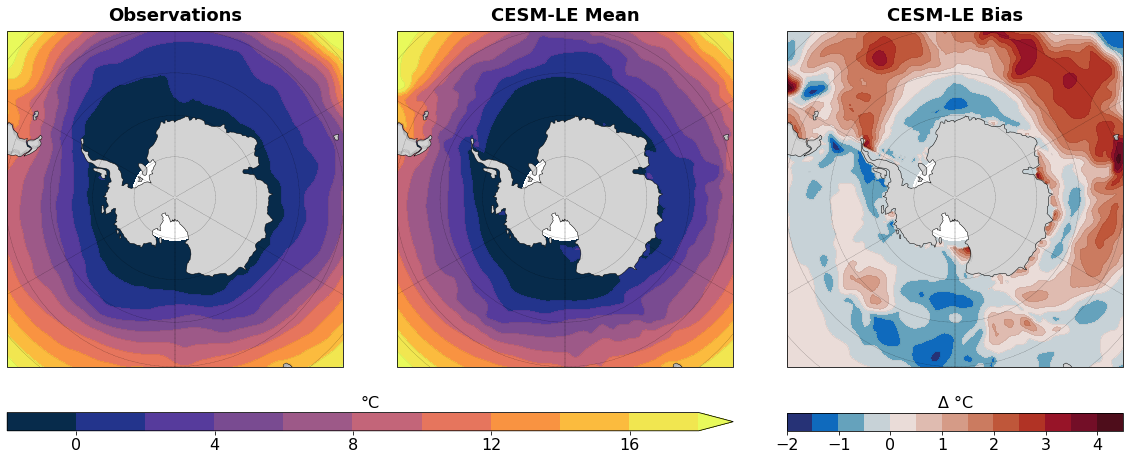

In [108]:
# Observations -- CESM-LE -- CESM-LE Bias
dsp = dsp_t
vp1 = 'dso_SST_mean'
vp2 = 'dsm_SST_mean'
vp3 = 'SST_mean_bias'
unit = '°C'
pt = 'SST-BIAS'
########################################################
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2,3, height_ratios=[2,0.1])
t1, t2, t3 = 'Observations', 'CESM-LE Mean', 'CESM-LE Bias'
########################################################

ax = fig.add_subplot(gs[0, 0], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = epoch_plot(dsp[vp1],lines = False)
ax.set_title(f'{t1}', fontsize = 18, fontweight = 'bold',pad=10)
# --------------------------------------------------------
ax = fig.add_subplot(gs[0, 1], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = epoch_plot(dsp[vp2],lines = False)
ax.set_title(f'{t2}', fontsize = 18, fontweight = 'bold',pad=10)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cbax = plt.subplot(gs[1,:2]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'{unit}', labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(labelsize=16)
########################################################
ax = fig.add_subplot(gs[0, 2], projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = change_plot(dsp[vp3], lines=False)
ax.set_title(f'{t3}', fontsize = 18, fontweight = 'bold',pad=10)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cbax = plt.subplot(gs[1,2:]) # Place it where it should be.
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal')#, ticklocation = 'top')
cb.set_label(f'$\Delta$ {unit}',  labelpad=5, fontsize = 16)
cb.ax.xaxis.set_label_position('top')
#cb.ax.set_xticklabels(cb_labels)

cb.ax.tick_params(labelsize=16)

########################################################
ax = fig.get_axes()
gs.update(hspace=0.16, wspace= 0.16, bottom=0.4)

# --------------------------------------------------------
title = (f'{pt}-bias-05cont')
path = 'figures/'
file = '.pdf'
#plt.savefig(path + title + file, bbox_inches='tight')

___
# PCOLORMESH:

model output
min 0.0
max 6.092274341402422
mean 0.49876495408770377


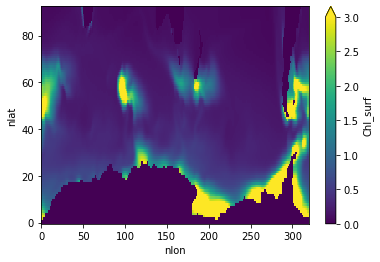

In [113]:
modeled = ds_mod_chl.mean(['member_id','time']).Chl_surf
print('model output')
ds_mod_chl.mean(['member_id','time']).Chl_surf.plot(vmax=3)
print('min',ds_mod_chl.mean(['member_id','time']).Chl_surf.min().values)
print('max',ds_mod_chl.mean(['member_id','time']).Chl_surf.max().values)
print('mean',ds_mod_chl.mean(['member_id','time']).Chl_surf.mean().values)

observations
min 0.0
max 34.496167822309395
mean 0.21483348077628256


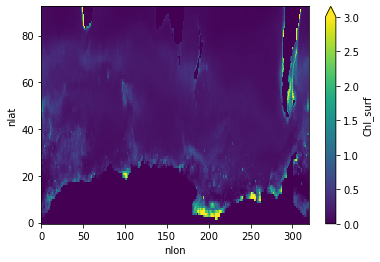

In [114]:
observational = ds_obs_chl.mean(['time']).Chl_surf
print('observations')
ds_obs_chl.mean(['time']).Chl_surf.plot(vmax=3)
print('min', ds_obs_chl.mean(['time']).Chl_surf.min().values)
print('max', ds_obs_chl.mean(['time']).Chl_surf.max().values)
print('mean', ds_obs_chl.mean(['time']).Chl_surf.mean().values)

bias
min -34.33490836137162
max 5.987840260313435
mean 0.28393147331142127


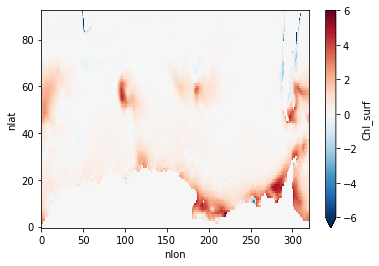

In [115]:
biased = ds_mod_chl.mean(['member_id','time']).Chl_surf - ds_obs_chl.mean(['time']).Chl_surf
print('bias')
biased.plot(vmax = 6)

print('min',biased.min().values)
print('max',biased.max().values)
print('mean',biased.mean().values)

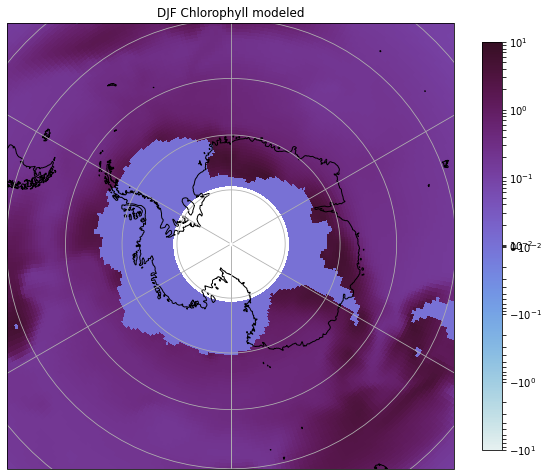

In [120]:
lon, lat = biased.TLONG, biased.TLAT

field = modeled

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([180, -180, -90,  -50], crs=ccrs.PlateCarree())

cmap = cmocean.cm.dense

cf = ax.pcolormesh(lon, lat, field,
                 cmap=cmap,
                 norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                               vmin=-10.0, vmax=10.0, base=10),
                 transform=ccrs.PlateCarree())

ax.coastlines('50m')
ax.gridlines()
plt.colorbar(cf, shrink=0.75);
ax.set_title('DJF Chlorophyll modeled');

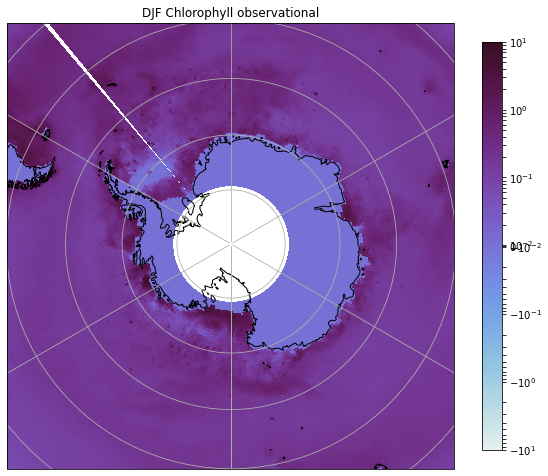

In [119]:
lon, lat = biased.TLONG, biased.TLAT

field = observational

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([180, -180, -90,  -50], crs=ccrs.PlateCarree())

cmap = cmocean.cm.dense

cf = ax.pcolormesh(lon, lat, field,
                 cmap=cmap,
                 norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                               vmin=-10.0, vmax=10.0, base=10),
                 transform=ccrs.PlateCarree())

ax.coastlines('50m')
ax.gridlines()
plt.colorbar(cf, shrink=0.75);
ax.set_title('DJF Chlorophyll observational');

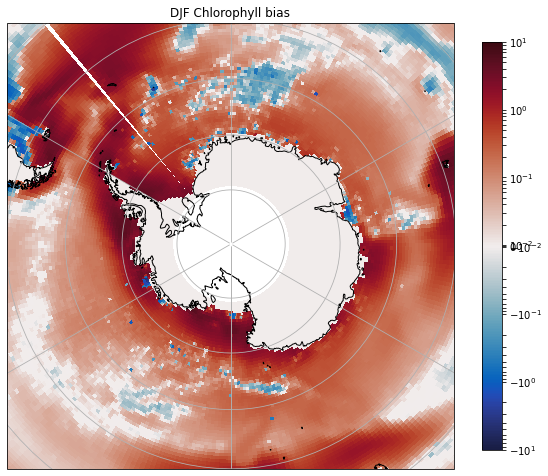

In [116]:
lon, lat = biased.TLONG, biased.TLAT

field = modeled - observational

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([180, -180, -90,  -50], crs=ccrs.PlateCarree())

cmap = cmocean.cm.balance

cf = ax.pcolormesh(lon, lat, field,
                 cmap=cmap,
                 norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                               vmin=-10.0, vmax=10.0, base=10),
                 transform=ccrs.PlateCarree())

ax.coastlines('50m')
ax.gridlines()
plt.colorbar(cf, shrink=0.75);
ax.set_title('DJF Chlorophyll bias');

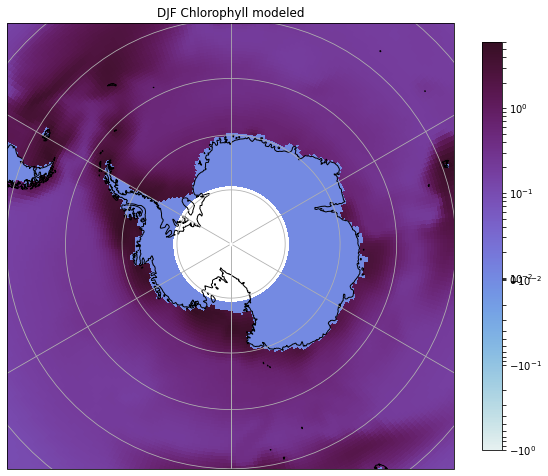

In [123]:
lon, lat = dsp_c.TLONG, dsp_c.TLAT

field = dsp_c.dsm_Chl_surf_mean

dsp = dsp_c
vp1 = 'dso_Chl_surf_mean'
vp2 = 'dsm_Chl_surf_mean'
vp3 = 'Chl_surf_mean_bias'
unit = 'mg m$^3$'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([180, -180, -90,  -50], crs=ccrs.PlateCarree())

cmap = cmocean.cm.dense

cf = ax.pcolormesh(lon, lat, field,
                 cmap=cmap,
                 norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                               vmin=-1.0, vmax=6.0, base=10),
                 transform=ccrs.PlateCarree())

ax.coastlines('50m')
ax.gridlines()
plt.colorbar(cf, shrink=0.75);
ax.set_title('DJF Chlorophyll modeled');

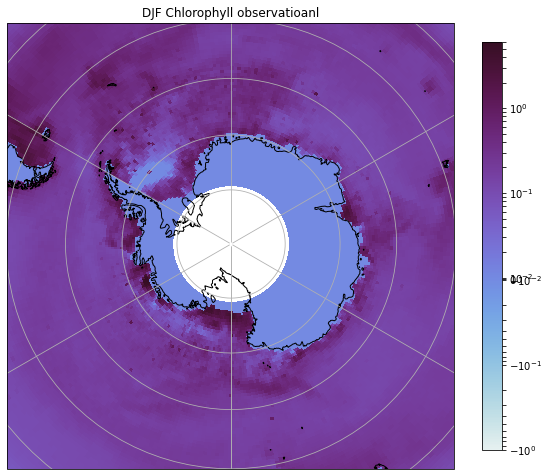

In [125]:
lon, lat = dsp_c.TLONG, dsp_c.TLAT

field = dsp_c.dso_Chl_surf_mean

dsp = dsp_c
vp1 = 'dso_Chl_surf_mean'
vp2 = 'dsm_Chl_surf_mean'
vp3 = 'Chl_surf_mean_bias'
unit = 'mg m$^3$'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([180, -180, -90,  -50], crs=ccrs.PlateCarree())

cmap = cmocean.cm.dense

cf = ax.pcolormesh(lon, lat, field,
                 cmap=cmap,
                 norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                               vmin=-1.0, vmax=6.0, base=10),
                 transform=ccrs.PlateCarree())

ax.coastlines('50m')
ax.gridlines()
plt.colorbar(cf, shrink=0.75);
ax.set_title('DJF Chlorophyll observatioanl');